<a href="https://colab.research.google.com/github/stophobia/text_processing/blob/main/text_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# テキスト処理(Text Processing)

## Bag of words

単語の順番とは無関係で出現頻度によって表現する方法。

各単語がどれくらい出現したのかが基準になる。

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['All our dreams can come true, if we have the courage to pursue them. I only hope that we don’t lose sight of one thing – that it was all started by a mouse.']
print(corpus)

vector = CountVectorizer()
bow = vector.fit_transform(corpus)

print(bow.toarray())
print(vector.vocabulary_)

['All our dreams can come true, if we have the courage to pursue them. I only hope that we don’t lose sight of one thing – that it was all started by a mouse.']
[[2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2]]
{'all': 0, 'our': 16, 'dreams': 6, 'can': 2, 'come': 3, 'true': 25, 'if': 9, 'we': 27, 'have': 7, 'the': 21, 'courage': 4, 'to': 24, 'pursue': 17, 'them': 22, 'only': 15, 'hope': 8, 'that': 20, 'don': 5, 'lose': 11, 'sight': 18, 'of': 13, 'one': 14, 'thing': 23, 'it': 10, 'was': 26, 'started': 19, 'by': 1, 'mouse': 12}


In [10]:
vector = CountVectorizer(stop_words='english')
bow = vector.fit_transform(corpus)

print(bow.toarray)
print(vector.vocabulary_)

<bound method _cs_matrix.toarray of <1x12 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>>
{'dreams': 3, 'come': 0, 'true': 11, 'courage': 1, 'pursue': 7, 'hope': 4, 'don': 2, 'lose': 5, 'sight': 8, 'thing': 10, 'started': 9, 'mouse': 6}


In [11]:
corpus = ['夢を追い続ける勇気さえあれば、すべての夢は実現できる。忘れないでほしい。全てはたった一匹のネズミから始まったということを。']

vector = CountVectorizer()
bow = vector.fit_transform(corpus)

print(bow.toarray())
print(vector.vocabulary_)

[[1 1 1 1]]
{'夢を追い続ける勇気さえあれば': 2, 'すべての夢は実現できる': 0, '忘れないでほしい': 3, '全てはたった一匹のネズミから始まったということを': 1}


## 文書単語行列

文書に登場する複数の単語の頻度を行列で表現したもの。

各文書に対してBoWを一つの行列として表現したもの。

In [12]:
corpus = [
    'All our dreams can come true, if we have the courage to pursue them. I only hope that we don’t lose sight of one thing – that it was all started by a mouse.',
    'The special secret of making dreams come true can be summarized in four C’s. They are Curiosity, Confidence, Courage, and Constancy.',
    'If you can dream it, you can do it.'
  ]

vector = CountVectorizer(stop_words='english')
bow = vector.fit_transform(corpus)

print(bow.toarray())
print(vector.vocabulary_)

[[1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1]
 [1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]]
{'dreams': 7, 'come': 0, 'true': 19, 'courage': 3, 'pursue': 12, 'hope': 8, 'don': 5, 'lose': 9, 'sight': 14, 'thing': 18, 'started': 16, 'mouse': 11, 'special': 15, 'secret': 13, 'making': 10, 'summarized': 17, 'curiosity': 4, 'confidence': 1, 'constancy': 2, 'dream': 6}


In [13]:
import pandas as pd
columns = []
for k, v in sorted(vector.vocabulary_.items(), key = lambda item:item[1]):
  columns.append(k)

df = pd.DataFrame(bow.toarray(), columns = columns)
df

,come,confidence,constancy,courage,curiosity,don,dream,dreams,hope,lose,making,mouse,pursue,secret,sight,special,started,summarized,thing,true
0,1,0,0,1,0,1,0,1,1,1,0,1,1,0,1,0,1,0,1,1
1,1,1,1,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## 語彙頻度・文書逆頻度（TF-IDF）

単純に頻度数が多い単語が核心単語ではなく、特定文書で集中的に登場する際に、その単語が文書のテーマを最も表している核心単語と想定。

特定文書で特定単語が多く登場し、その単語が他の文書で少なく登場したら、その単語を特定文書の核心単語と想定。

語彙頻度・文書逆頻度は語彙頻度と逆頻度を掛けて計算。

語彙頻度は、特定文書で特定単語が多く登場することを意味する。

$$ tf_{x,y} $$

逆文書頻度は、他の文書で登場しない単語の頻度を意味する。

$$ log(N/df_x) $$  

語彙頻度・文書逆頻度は下記のように表現する。

$$ W_{x,y} = tf_{x,y} * log(N/df_x) $$

語彙頻度・文書逆頻度を便利に計算するためscikit-learnのTFidfvectorizerを利用。

上記で計算した単語の頻度を入力して語彙頻度・文書逆頻度へ変換。

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words = 'english').fit(corpus)

print(tfidf.transform(corpus).toarray())
print(tfidf.vocabulary_)

[[0.2368148  0.         0.         0.2368148  0.         0.311383
  0.         0.2368148  0.311383   0.311383   0.         0.311383
  0.311383   0.         0.311383   0.         0.311383   0.
  0.311383   0.2368148 ]
 [0.24920411 0.32767345 0.32767345 0.24920411 0.32767345 0.
  0.         0.24920411 0.         0.         0.32767345 0.
  0.         0.32767345 0.         0.32767345 0.         0.32767345
  0.         0.24920411]
 [0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]]
{'dreams': 7, 'come': 0, 'true': 19, 'courage': 3, 'pursue': 12, 'hope': 8, 'don': 5, 'lose': 9, 'sight': 14, 'thing': 18, 'started': 16, 'mouse': 11, 'special': 15, 'secret': 13, 'making': 10, 'summarized': 17, 'curiosity': 4, 'confidence': 1, 'constancy': 2, 'dream': 6}


DataFrameで変換。

In [15]:
columns = []
for k, v in sorted(tfidf.vocabulary_.items(), key = lambda item:item[1]):
  columns.append(k)

df = pd.DataFrame(tfidf.transform(corpus).toarray(), columns = columns)
df

,come,confidence,constancy,courage,curiosity,don,dream,dreams,hope,lose,making,mouse,pursue,secret,sight,special,started,summarized,thing,true
0,0.236815,0.000000,0.000000,0.236815,0.000000,0.311383,0.0,0.236815,0.311383,0.311383,0.000000,0.311383,0.311383,0.000000,0.311383,0.000000,0.311383,0.000000,0.311383,0.236815
1,0.249204,0.327673,0.327673,0.249204,0.327673,0.000000,0.0,0.249204,0.000000,0.000000,0.327673,0.000000,0.000000,0.327673,0.000000,0.327673,0.000000,0.327673,0.000000,0.249204
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## スパムデータ分類

In [16]:
!wget https://raw.githubusercontent.com/stophobia/text_processing/main/spam.csv

--2022-08-27 22:11:26--  https://raw.githubusercontent.com/stophobia/text_processing/main/spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 505042 (493K) [text/plain]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 493.21K  --.-KB/s    in 0.04s   

2022-08-27 22:11:27 (11.2 MB/s) - ‘spam.csv’ saved [505042/505042]



In [17]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [18]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1, inplace = True)
df.columns = ['target', 'message']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [19]:
import re
import string
def clean_text(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('http?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)

  return text

In [20]:
stop_words = stopwords.words('english')
stop_words = stop_words + ['u', 'im', 'c']
stemmer = nltk.SnowballStemmer('english')

def preprocess_data(text):
  text = clean_text(text)
  text = ' '.join(word for word in text.split(' ') if word not in stop_words)
  text = ' '.join(stemmer.stem(word) for word in text.split(' '))

  return text

In [21]:
df['message'] = df['message'].apply(preprocess_data)
df.head()

,target,message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif oni
2,spam,free entri wkli comp win fa cup final tkts m...
3,ham,dun say earli hor alreadi say
4,ham,nah dont think goe usf live around though


In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X = df.message
Y = df.target

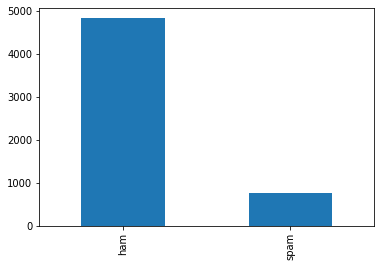

In [23]:
Y.value_counts().plot(kind = 'bar')

In [24]:
print('最大の長さ: {}', format(max(len(l) for l in X)))
print('平均の長さ: {}', format((sum(map(len, X)) / len(X))))

最大の長さ: {} 477
平均の長さ: {} 46.367193108399135


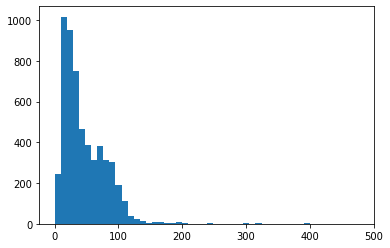

In [25]:
import matplotlib.pyplot as plt

plt.hist([len(s) for s in X], bins = 50)
plt.show()

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

tfidf = TfidfVectorizer(min_df = 2, ngram_range = (1, 2), stop_words = 'english', strip_accents = 'unicode', norm = 'l2')
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(4457, 5986) (1115, 5986) (4457,) (1115,)


## Logistic Regression

* クラスが2つの2進分類のためのモデル
* ロジスティック回帰の予測関数を定義

\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}} \\
\hat{y} = \sigma(w_0 + w_1 x_1 + ... + w_p x_p)
\end{equation}

* $\sigma$: シグモイド関数
  
* ロジスティック回帰モデルは、線形回帰モデルにシグモイド関数を適用。

* ロジスティック回帰の学習目標は次のような目的関数を最小化するパラメータ$w$を探すこと。

\begin{equation}
BinaryCrossEntropy = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{equation}

* Logistic Regressionは、特性上多重分類には適合してない。

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(X_train, Y_train)

pred = LR.predict(X_test)
acc = accuracy_score(pred, Y_test)
print(acc)

cm = confusion_matrix(Y_test, pred)
print(cm)

cr = classification_report(Y_test, pred)
print(cr)

0.968609865470852
[[965   3]
 [ 32 115]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       968
           1       0.97      0.78      0.87       147

    accuracy                           0.97      1115
   macro avg       0.97      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



## Naive Bayes Classification

* ベイズ整理を利用した確率的分類アルゴリズム
* 全ての特性が独立している想定
* 入力特性により3つの分類が存在
 * Gaussian Naive Bayes Classification
 * Bernui Naive Bayes Classification
 * 多項Naive Bayes Classification

In [28]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, Y_train)

pred = NB.predict(X_test)
acc = accuracy_score(pred, Y_test)
print(acc)

cm = confusion_matrix(Y_test, pred)
print(cm)

cr = classification_report(Y_test, pred)
print(cr)

0.9713004484304932
[[968   0]
 [ 32 115]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       968
           1       1.00      0.78      0.88       147

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



## サポート・ベクター・マシン

* 回帰、分類、異常値探知等に利用する指導学習
* サポート・ベクター：クラス同士の境界に位置したデータポイント
* 各サポート・ベクターがクラス間の決定境界の区分にどれくらい重要かを学習
* 各サポート・ベクター間のマージンが最も大きい方向へ学習
* サポート・ベクターまでの距離とサポート・ベクターの重要度を根拠に予測を実行

In [29]:
from sklearn import svm

SVM = svm.SVC(kernel = 'linear')
SVM.fit(X_train, Y_train)

pred = SVM.predict(X_test)
acc = accuracy_score(pred, Y_test)
print(acc)

cm = confusion_matrix(Y_test, pred)
print(cm)

cr = classification_report(Y_test, pred)
print(cr)

0.9847533632286996
[[964   4]
 [ 13 134]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       968
           1       0.97      0.91      0.94       147

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



## 確率的傾斜下向法（Stochastic Gradient Descent）

In [30]:
from sklearn.linear_model import SGDClassifier

SGD = SGDClassifier(alpha = .0001)
SGD.fit(X_train, Y_train)

pred = SGD.predict(X_test)
acc = accuracy_score(pred, Y_test)
print(acc)

cm = confusion_matrix(Y_test, pred)
print(cm)

cr = classification_report(Y_test, pred)
print(cr)

0.9829596412556054
[[961   7]
 [ 12 135]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       968
           1       0.95      0.92      0.93       147

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



## 決定木（Decision Tree）

* 分類、回帰に利用する指導学習方法
* データ特性から推論した決定規則から値を予測
* if-then-else決定規則からデータ学習

In [31]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

pred = DT.predict(X_test)
acc = accuracy_score(pred, Y_test)
print(acc)

cm = confusion_matrix(Y_test, pred)
print(cm)

cr = classification_report(Y_test, pred)
print(cr)

0.9614349775784753
[[941  27]
 [ 16 131]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       968
           1       0.83      0.89      0.86       147

    accuracy                           0.96      1115
   macro avg       0.91      0.93      0.92      1115
weighted avg       0.96      0.96      0.96      1115



## ランダム・フォレスト（Random Forest）

* アンサンブル学習方法の一つ
* 多数の決定木を利用して分類、回帰に利用

In [32]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 10)
RF.fit(X_train, Y_train)

pred = RF.predict(X_test)
acc = accuracy_score(pred, Y_test)
print(acc)

cm = confusion_matrix(Y_test, pred)
print(cm)

cr = classification_report(Y_test, pred)
print(cr)

0.9739910313901345
[[966   2]
 [ 27 120]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       968
           1       0.98      0.82      0.89       147

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



## XGBoost

* 木基盤のアンサンブル学習方法
* 分類で他のアルゴリズムより優れた予測性能
* XGBoostはGBM基盤だが、GBMの短所である遅い遂行時間と過適合規制不在等の問題を解決
* 並列CPU環境で速く学習可能

In [33]:
from xgboost import XGBClassifier

XGB = XGBClassifier()
XGB.fit(X_train, Y_train)

pred = XGB.predict(X_test)
acc = accuracy_score(pred, Y_test)
print(acc)

cm = confusion_matrix(Y_test, pred)
print(cm)

cr = classification_report(Y_test, pred)
print(cr)

0.9587443946188341
[[967   1]
 [ 45 102]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       968
           1       0.99      0.69      0.82       147

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



## ニュースグループデータ分類

* 文書分類に必要なデータはscikit-learnが提供する20個のテーマで分けられたニュースグループのデータを利用。

* テキストはTfidfTransformerを使ってTFーIDF形式に変更

In [34]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfTransformer

news = fetch_20newsgroups()

X = news.data
Y = news.target

In [35]:
print('最大の長さ： {}', format(max(len(l) for l in X)))
print('平均の長さ： {}', format((sum(map(len, X)) / len(X))))

最大の長さ： {} 75154
平均の長さ： {} 1949.3100583348064


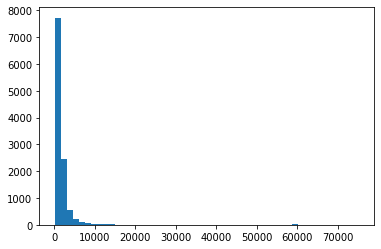

In [36]:
import matplotlib.pyplot as plt
plt.hist([len(s) for s in X], bins = 50)
plt.show()

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

tfidf = TfidfVectorizer(min_df = 2, ngram_range = (1, 2), stop_words = 'english', strip_accents = 'unicode', norm = 'l2')
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(8485, 224671) (2829, 224671) (8485,) (2829,)


## Naive Bayes

In [40]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, Y_train)

pred = NB.predict(X_test)
acc = accuracy_score(pred, Y_test)
print(acc)

cm = confusion_matrix(Y_test, pred)
print(cm)

cr = classification_report(Y_test, pred)
print(cr)

0.8727465535524921
[[110   0   0   0   0   0   0   0   0   1   1   0   0   0   1  11   1   1
    0   0]
 [  1 115   2   3   3   6   3   1   1   0   1   1   0   0   4   2   0   0
    0   0]
 [  1   3 123   3   2   4   3   0   0   1   1   1   0   0   0   0   0   0
    0   0]
 [  0   3   8 131   7   4   9   0   2   0   2   1   1   1   1   0   2   1
    0   0]
 [  0   1   3   5 117   0   4   0   2   3   3   1   3   1   0   1   1   2
    0   0]
 [  0   5   1   1   0 127   2   0   1   2   2   0   0   0   0   0   0   1
    0   0]
 [  0   0   1   3   1   0 109   2   0   2   2   0   3   3   1   0   0   0
    0   0]
 [  0   1   0   0   1   0   3 142   4   1   3   0   0   1   1   1   2   0
    0   0]
 [  0   0   0   0   0   0   3   2 131   0   1   0   0   0   0   0   1   0
    0   0]
 [  0   0   0   0   0   0   1   0   1 126   4   0   1   0   0   0   0   0
    0   0]
 [  0   1   0   0   0   0   2   0   0   1 139   0   0   0   0   0   0   0
    0   0]
 [  0   1   1   0   0   0   0   0   0   0   0 

## サポート・ベクター

In [41]:
from sklearn import svm

SVM = svm.SVC(kernel = 'linear')
SVM.fit(X_train, Y_train)

pred = SVM.predict(X_test)
acc = accuracy_score(pred, Y_test)
print(acc)

cm = confusion_matrix(Y_test, pred)
print(cm)

cr = classification_report(Y_test, pred)
print(cr)

0.9095086603039944
[[116   0   0   0   0   0   0   0   0   1   0   0   0   0   0   3   0   0
    1   5]
 [  1 120   2   4   1   7   3   0   1   0   0   0   2   0   1   1   0   0
    0   0]
 [  0   5 126   3   0   4   2   0   0   0   1   0   1   0   0   0   0   0
    0   0]
 [  0   3   6 142   8   1   6   0   0   0   0   0   5   1   0   0   0   1
    0   0]
 [  0   4   0   7 126   1   2   0   0   1   0   0   6   0   0   0   0   0
    0   0]
 [  0   8   2   0   0 128   2   0   0   2   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   1   4   4   0 111   3   0   0   0   0   3   1   0   0   0   0
    0   0]
 [  0   1   1   0   2   0   3 147   1   1   1   0   1   1   0   0   1   0
    0   0]
 [  0   0   1   0   0   0   3   3 129   0   1   0   1   0   0   0   0   0
    0   0]
 [  0   1   1   0   1   0   1   1   1 126   1   0   0   0   0   0   0   0
    0   0]
 [  0   1   0   0   1   0   2   0   0   3 136   0   0   0   0   0   0   0
    0   0]
 [  0   1   2   0   1   1   0   0   0   0   0 

## 確率的傾斜下向法

In [42]:
from sklearn.linear_model import SGDClassifier

SGD = SGDClassifier(alpha = .0001)
SGD.fit(X_train, Y_train)

pred = SGD.predict(X_test)
acc = accuracy_score(pred, Y_test)
print(acc)

cm = confusion_matrix(Y_test, pred)
print(cm)

cr = classification_report(Y_test, pred)
print(cr)

0.9257688229056203
[[117   0   0   0   0   0   0   0   0   0   0   0   0   1   0   1   1   0
    0   6]
 [  0 124   2   3   0   8   3   0   0   0   0   0   0   0   1   2   0   0
    0   0]
 [  0   4 127   2   2   3   3   0   0   0   1   0   0   0   0   0   0   0
    0   0]
 [  0   2   9 142   5   2   4   0   0   0   0   0   6   1   0   0   1   1
    0   0]
 [  1   0   1   3 135   0   1   0   0   2   0   0   3   1   0   0   0   0
    0   0]
 [  0   6   2   0   0 130   3   0   0   1   0   0   0   0   0   0   0   0
    0   0]
 [  0   1   2   3   2   0 110   4   0   0   1   0   2   2   0   0   0   0
    0   0]
 [  0   1   2   0   0   0   3 149   1   0   1   0   0   1   0   0   1   0
    1   0]
 [  1   0   0   0   0   0   1   1 135   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   1   1 131   0   0   0   0   0   0   0   0
    0   0]
 [  0   1   0   0   1   0   2   0   0   2 137   0   0   0   0   0   0   0
    0   0]
 [  0   1   2   0   0   0   0   0   0   0   0 

## 決定木

In [43]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

pred = DT.predict(X_test)
acc = accuracy_score(pred, Y_test)
print(acc)

cm = confusion_matrix(Y_test, pred)
print(cm)

cr = classification_report(Y_test, pred)
print(cr)

0.6677271120537293
[[ 88   0   0   1   2   0   2   5   0   2   0   0   0   4   1   6   1   1
    4   9]
 [  1  79   7  10   6   9   6   5   3   2   3   1   6   2   1   0   0   1
    0   1]
 [  0  12  96   9   4   6   2   0   2   3   0   0   2   0   0   1   0   0
    2   3]
 [  1   8  27  79  10   4  15   4   1   0   1   1  13   2   1   2   0   0
    3   1]
 [  1   5   4  10  86   7   8   2   1   1   1   0   9   0   5   2   1   0
    2   2]
 [  0   9  11   3   3  90   1   0   1   3   2   2   5   3   4   2   0   0
    2   1]
 [  0   1   1   5   5   0  87   9   1   1   1   2   7   1   3   1   1   0
    0   1]
 [  0   2   3   2   4   3  11 102   8   1   2   0   4   6   4   2   4   1
    0   1]
 [  0   4   1   2   2   1   1   7 106   1   1   0   1   1   4   0   3   0
    1   2]
 [  0   2   1   2   1   4   3   2   2  96  10   3   4   0   0   0   2   0
    1   0]
 [  1   0   1   2   1   1   5   1   1  11 113   0   2   0   1   0   1   0
    1   1]
 [  0   3   3   1   1   1   0   1   3   3   0 

## ランダムフォレスト

In [44]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 10)
RF.fit(X_train, Y_train)

pred = RF.predict(X_test)
acc = accuracy_score(pred, Y_test)
print(acc)

cm = confusion_matrix(Y_test, pred)
print(cm)

cr = classification_report(Y_test, pred)
print(cr)

0.7419582891481089
[[103   0   0   0   2   2   0   1   1   0   0   0   0   2   1   6   1   0
    1   6]
 [  2  97   6   5   9  11   3   1   1   1   0   0   3   1   2   1   0   0
    0   0]
 [  0  12 105   7   1   8   4   0   0   1   1   0   2   0   0   1   0   0
    0   0]
 [  0  19  17  89  14   5   9   5   0   1   1   3   6   2   1   0   1   0
    0   0]
 [  1   9   3  18  98   2   5   2   0   2   0   0   5   1   0   1   0   0
    0   0]
 [  0  16   8   4   4 105   0   1   1   1   0   0   1   0   1   0   0   0
    0   0]
 [  0   3   4   4   8   3  94   3   0   0   1   0   6   0   0   1   0   0
    0   0]
 [  1   7   0   3   1   1   7 130   3   1   0   1   2   2   0   0   1   0
    0   0]
 [  1   2   1   3   3   0   6   3 115   1   1   0   1   0   1   0   0   0
    0   0]
 [  0   4   0   1   2   1   1   0   3 102  16   0   2   1   0   0   0   0
    0   0]
 [  0   4   0   1   2   0   2   1   1  13 118   0   1   0   0   0   0   0
    0   0]
 [  1   5   2   1   2   0   0   0   0   0   0 

## XGBoost

In [45]:
from xgboost import XGBClassifier

XGB = XGBClassifier()
XGB.fit(X_train, Y_train)

pred = XGB.predict(X_test)
acc = accuracy_score(pred, Y_test)
print(acc)

cm = confusion_matrix(Y_test, pred)
print(cm)

cr = classification_report(Y_test, pred)
print(cr)

0.8123011664899258
[[ 99   1   1   0   0   0   0   1   0   0   1   0   1   3   0   3   1   1
    2  12]
 [  0 108  10   4   5   5   7   0   0   0   0   0   3   0   1   0   0   0
    0   0]
 [  0   4 122   7   0   2   1   0   0   0   0   0   5   0   0   0   0   0
    1   0]
 [  0  10  20 113   6   1   5   1   0   0   1   0  10   1   0   1   3   0
    1   0]
 [  0   0   4   8 113   1   4   0   0   1   0   0  14   2   0   0   0   0
    0   0]
 [  0   8   8   5   0 111   0   0   0   1   0   0   8   0   0   0   0   0
    0   1]
 [  0   2   2   5   3   1  94   4   2   1   0   1   7   1   1   0   1   0
    2   0]
 [  0   3   0   4   1   0   8 130   4   2   0   0   3   2   0   0   3   0
    0   0]
 [  0   1   0   1   0   0   2   3 121   2   1   0   2   0   1   1   1   0
    1   1]
 [  0   1   0   2   0   1   0   0   0 114   3   1  11   0   0   0   0   0
    0   0]
 [  0   0   0   0   2   0   1   0   0   9 124   0   5   0   1   1   0   0
    0   0]
 [  0   0   3   0   1   1   0   0   2   0   0 